the value of h is 0.009425720532822661


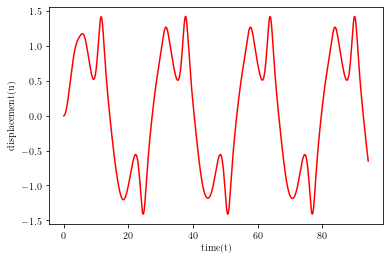

The value of GAMMA = 0.35


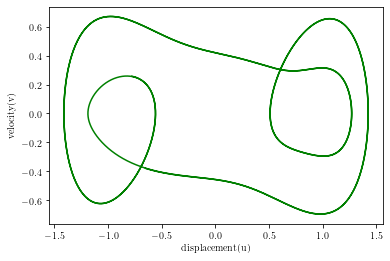

SAMPLING


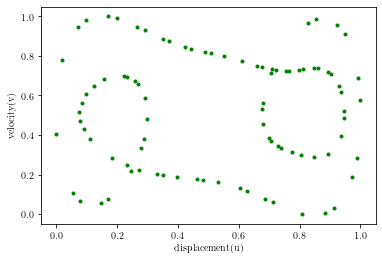

Rips complex is of dimension 2 - 9421 simplices - 90 vertices
Entropy for Dim 1 is [1.2970938]


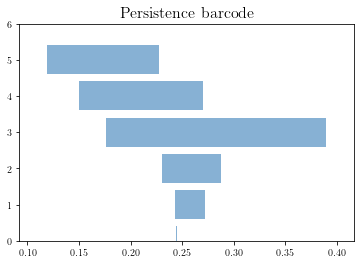

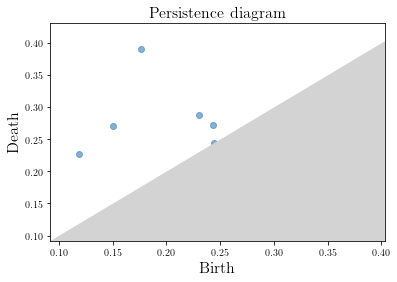

In [32]:
from os import path
from math import isfinite
import numpy as np

from gudhi.reader_utils import read_persistence_intervals_in_dimension
from gudhi.reader_utils import read_persistence_intervals_grouped_by_dimension

def __min_birth_max_death(persistence, band=0.0):
    # Look for minimum birth date and maximum death date for plot optimisation
    max_death = 0
    min_birth = persistence[0][1][0]
    for interval in reversed(persistence):
        if float(interval[1][1]) != float("inf"):
            if float(interval[1][1]) > max_death:
                max_death = float(interval[1][1])
        if float(interval[1][0]) > max_death:
            max_death = float(interval[1][0])
        if float(interval[1][0]) < min_birth:
            min_birth = float(interval[1][0])
    if band > 0.0:
        max_death += band
    return (min_birth, max_death)


def _array_handler(a):
    if isinstance(a[0][1], np.float64) or isinstance(a[0][1], float):
        return [[0, x] for x in a]
    else:
        return a

def plot_persistence_barcode(
    persistence=[],
    persistence_file="",
    alpha=0.6,
    max_intervals=1000,
    max_barcodes=1000,
    inf_delta=0.1,
    legend=False,
    colormap=None,
    axes=None,
    fontsize=16,
    filtration=0
):
    try:
        import matplotlib.pyplot as plt
        import matplotlib.patches as mpatches
        from matplotlib import rc
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')

        if persistence_file != "":
            if path.isfile(persistence_file):
                # Reset persistence
                persistence = []
                diag = read_persistence_intervals_grouped_by_dimension(
                    persistence_file=persistence_file
                )
                for key in diag.keys():
                    for persistence_interval in diag[key]:
                        persistence.append((key, persistence_interval))
            else:
                print("file " + persistence_file + " not found.")
                return None

        persistence = _array_handler(persistence)

        if max_barcodes != 1000:
            print("Deprecated parameter. It has been replaced by max_intervals")
            max_intervals = max_barcodes

        if max_intervals > 0 and max_intervals < len(persistence):
            # Sort by life time, then takes only the max_intervals elements
            persistence = sorted(
                persistence,
                key=lambda life_time: life_time[1][1] - life_time[1][0],
                reverse=True,
            )[:max_intervals]
        
        if colormap == None:
            colormap = plt.cm.Set1.colors
        if axes == None:
            fig, axes = plt.subplots(1, 1)

        persistence = sorted(persistence, key=lambda birth: birth[1][0])

        (min_birth, max_death) = __min_birth_max_death(persistence)
        ind = 0
        delta = (max_death - min_birth) * inf_delta
        # Replace infinity values with max_death + delta for bar code to be more
        # readable
        infinity = max_death + delta
        axis_start = min_birth - delta
        # Draw horizontal bars in loop
        for interval in reversed(persistence):
            if float(interval[1][1]) != float("inf"):
                # Finite death case
                axes.barh(
                    ind,
                    (interval[1][1] - interval[1][0]),
                    height=0.8,
                    left=interval[1][0],
                    alpha=alpha,
                    color=colormap[interval[0]],
                    linewidth=0,
                )
            else:
                # Infinite death case for diagram to be nicer
                axes.barh(
                    ind,
                    (infinity - interval[1][0]),
                    height=0.8,
                    left=interval[1][0],
                    alpha=alpha,
                    color=colormap[interval[0]],
                    linewidth=0,
                )
            ind = ind + 1
        axes.arrow(filtration, 0, 0, 10, head_width=0.05, head_length=0.1, fc='k', ec='k')

        if legend:
            dimensions = list(set(item[0] for item in persistence))
            axes.legend(
                handles=[
                    mpatches.Patch(color=colormap[dim], label=str(dim))
                    for dim in dimensions
                ],
                loc="lower right",
            )

        axes.set_title("Persistence barcode", fontsize=fontsize)

        # Ends plot on infinity value and starts a little bit before min_birth
        axes.axis([axis_start, infinity, 0, ind])
        return axes, infinity

    except ImportError:
        print("This function is not available, you may be missing matplotlib.")
### duffing oscillator

import matplotlib
import numpy as np
from numpy import zeros, linspace, pi, cos, array
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
from matplotlib.patches import PathPatch

t0=0
tf=30*pi
omega=1.2                     
beta=1              
delta=0.3             
gamma=0.35          
alpha=1              
n=10000                                    #iteration

sampsize=90                               #SampleSize
sampstart=5000                             #SampleStart
sampend=n                                  #SampleEnd

h=(tf-t0)/(n-1)                            #stepsize
print('the value of h is',h)
u0=0                                       #initial displacement


t=linspace(t0,tf,n)
v=zeros([n])
u=zeros([n])
u[0]=u0
v[0]=0                                     #initial velocity

##### DEFINING FUNCTIONS

def dudt(t,u,v):                                                #### u' = v                                              
    return(v)

def funt(t,u,v):                                                #### v' = -delta*v+alpha*u-beta*u**3+gamma*cos(omega*t)   
    return (-delta*v+alpha*u-beta*u**3+gamma*cos(omega*t))

######  RK4 ALGORITHM USING FOR LOOP
 
for i in range(1,n):
    k1=h*dudt(t[i-1],u[i-1],v[i-1])
    l1=h*funt(t[i-1],u[i-1],v[i-1])
    
    k2=h*dudt(t[i-1]+(0.5*h),u[i-1]+(k1*0.5),v[i-1]+(l1*0.5))
    l2=h*funt(t[i-1]+(0.5*h),u[i-1]+(k1*0.5),v[i-1]+(l1*0.5))
    
    k3=h*dudt(t[i-1]+(0.5*h),u[i-1]+(k2*0.5),v[i-1]+(l2*0.5))
    l3=h*funt(t[i-1]+(0.5*h),u[i-1]+(k2*0.5),v[i-1]+(l2*0.5))
    
    k4=h*dudt(t[i-1]+h,u[i-1]+(k3),v[i-1]+(l3))
    l4=h*funt(t[i-1]+h,u[i-1]+(k3),v[i-1]+(l3))
    
    u[i]=u[i-1]+(1/6)*(k1+(2*k2)+(2*k3)+k4)
    v[i]=v[i-1]+(1/6)*(l1+(2*l2)+(2*l3)+l4)

### PLOT

plt.plot(t,u,'-r')
plt.xlabel('time(t)')
plt.ylabel('displacement(u)')
plt.show()
print('The value of GAMMA =',gamma)
fig = plt.figure()
plt.plot(u[sampstart:sampend],v[sampstart:sampend],'-g')
plt.xlabel('displacement(u)')
plt.ylabel('velocity(v)')
plt.show()

#### InterPlay

import pandas as pd 
xx = lambda a: np.interp(a, (a.min(), a.max()), (0, +1))
uu = xx(u[sampstart:sampend:int(sampsize/2)])
vv = xx(v[sampstart:sampend:int(sampsize/2)])
huh = np.array(list(zip(uu,vv)))

huh = huh[np.random.choice(huh.shape[0], sampsize, replace=False), :]
u1,v1 = zip(*huh)

#print(huh)
pd.DataFrame(huh).to_csv("data/seed1_data.csv", header=['X_value','Y_value'], index=True, index_label='point_id')

#### SAMPLING

print("SAMPLING")


fig = plt.figure()
plt.plot(u1,v1,'.g')
plt.xlabel('displacement(u)')
plt.ylabel('velocity(v)')
plt.show()

my_data = huh
from gudhi import *
import gudhi

rips_complex = gudhi.RipsComplex(points=my_data, sparse=0.3)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices'
print(result_str)

BarCodes_RipsAll = simplex_tree.persistence()
BarCodes_Rips1 = list(filter(lambda BettiNum: BettiNum[0] == 1, BarCodes_RipsAll))

axes, max_filtration_value = plot_persistence_barcode(BarCodes_Rips1)
gudhi.plot_persistence_diagram(BarCodes_Rips1)

entropy = representations.Entropy(normalized=True)
print("Entropy for Dim 1 is {}".format(entropy(np.array([j for i, j in BarCodes_Rips1]))))

In [105]:
def genDiagWithFilt(points, length):
    rc = gudhi.RipsComplex(points=points, max_edge_length=length)
    st = rc.create_simplex_tree(max_dimension=2)
    max_filtration_value = np.array(list(st.get_filtration()))[-1, 1]

    # We are only going to plot the triangles
    triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3])
    return max_filtration_value, triangles, st

from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from matplotlib.patches import Polygon
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
from matplotlib.patches import PathPatch

fetch = []

for i in np.linspace(max_filtration_value/10, max_filtration_value, 10):
    fil, triangles, st = genDiagWithFilt(huh, length=i)
    hey = [j[0] for j in st.get_simplices()]
    patches = []
    patchesc = []
    patchescc = []

    kalel = [huh[j] for j in hey]

    for x1, y1 in huh:
        circle = Circle((x1, y1), fil, fc="yellow", alpha=0.2 , ec="blue")
        patchesc.append(circle)

    for kkk in kalel:
        if len(kkk) > 2:
            polygon = Polygon(kkk, edgecolor='blue', alpha=0.7)
            patches.append(polygon)
        if len(kkk) == 2:
            path_data = [(Path.MOVETO, kkk[0]), (Path.LINETO, kkk[1]),]
            codes, verts = zip(*path_data)
            path = Path(verts, codes)
            patch = PathPatch(path, edgecolor='blue', alpha=0.7)
            patchescc.append(patch)
    fetch.append([hey, fil, triangles, st, patches, patchesc, patchescc, kalel])
@interact
def blah(iter=(0, 10, 1)):
    fig3, ax3 = plt.subplots()
    hey, fil, triangles, st, patches, patchesc, patchescc, kalel = fetch[iter]
    for circle in patchesc:
        ax3.add_patch(circle)
    for polygon in patches:
        ax3.add_patch(polygon)
    for line in patchescc:
        ax3.add_patch(line)

    plt.ylim((0-max_filtration_value/2, 1+max_filtration_value/2))
    plt.xlim((0-max_filtration_value/2, 1+max_filtration_value/2))
    ax3.set_title('specified filtration: {}'.format(fil))
    ax3.set_aspect(anchor='C', aspect='auto')
    plt.plot(u1,v1,'.r')
    plot_persistence_barcode(BarCodes_Rips1, filtration=fil)
    plt.show()

interactive(children=(IntSlider(value=5, description='iter', max=10), Output()), _dom_classes=('widget-interac…

In [109]:
@interact
def blah(iter=(0, 10, 1)):
    hey, max_filtration_value, triangles, st, patches, patchesc, patchescc, kalel = fetch[iter]

    fig2, ax2 = plt.subplots()
    ax2.set_aspect('equal')
    ax2.triplot(u1, v1, triangles, 'go-', lw=2.0,alpha=0.5)
    ax2.set_title('triplot of user-specified triangulation, filtration: {}'.format(max_filtration_value))
    ax2.set_xlabel('Longitude (degrees)')
    ax2.set_ylabel('Latitude (degrees)')

    plt.show()
    plot_persistence_barcode(BarCodes_Rips1, filtration=max_filtration_value)

interactive(children=(IntSlider(value=5, description='iter', max=10), Output()), _dom_classes=('widget-interac…